# Import movie files

In [301]:
import pandas as pd
from datetime import datetime, date
import time
import numpy as np
import re

In [2]:
movie_file = 'movies2000_2016.csv'
plot_file = 'plots2000_2016.csv'
actor_file = 'actors2000_2016.csv'
director_file = 'directors2000_2016.csv'

In [3]:
movie_df = pd.read_csv(movie_file)
plot_df = pd.read_csv(plot_file)
actor_df = pd.read_csv(actor_file)
director_df = pd.read_csv(director_file)

In [136]:
print movie_df.columns.values
print "---------------------------------------------------------------------------"
print movie_df[:4]

['length' 'based_on' 'box_office' 'budget' 'cinematography' 'country'
 'director' 'distributor' 'editor' 'language' 'music' 'narration'
 'producer' 'screenplay' 'starring' 'story' 'written_by' 'site' 'title'
 'studio' 'revenues' 'stars_list' 'directors_list' 'check_rev' 'costs'
 'check_costs' 'release_dates' 'release_year' 'release_month' 'release_day']
---------------------------------------------------------------------------
        length                                        based_on  \
0  100 minutes  The Hundred and One Dalmatians\rby Dodie Smith   
1  103 minutes  The Hundred and One Dalmatians\rby Dodie Smith   
2  104 minutes                                             NaN   
3   82 minutes                                             NaN   

          box_office           budget cinematography        country  \
0  $183.6 million[1]      $85 million  Adrian Biddle  United States   
1  $320.6 million[2]   $75 million[1]  Adrian Biddle  United States   
2   $62.2 million[1]   $

In [5]:
print plot_df.columns.values
print "---------------------------------------------------------------------------"
print plot_df[:2]

['site' 'plot']
---------------------------------------------------------------------------
                                                site  \
0  https://en.wikipedia.org/wiki/%22Crocodile%22_...   
1  https://en.wikipedia.org/wiki/%C3%86on_Flux_(f...   

                                                plot  
0  A year has passed since the events of Crocodil...  
1  In 2011, a deadly pathogenic virus has killed ...  


In [6]:
print actor_df.columns.values
print "---------------------------------------------------------------------------"
print actor_df[:2]

['actor_name' 'movies' 'revenues' 'costs' 'gross_profit' 'return' 'count']
---------------------------------------------------------------------------
     actor_name                                             movies   revenues  \
0  Jacki Weaver  [https://en.wikipedia.org/wiki/Magic_in_the_Mo...  301356377   
1   Paul McGill   [https://en.wikipedia.org/wiki/Fame_(2009_film)]   77184633   

      costs  gross_profit    return  count  
0  70800000    79878188.5  1.128223      5  
1  18000000    20592316.5  1.144018      1  


In [7]:
print director_df.columns.values
print "---------------------------------------------------------------------------"
print director_df[:2]

['director_name' 'movies' 'revenues' 'costs' 'gross_profit' 'return'
 'count']
---------------------------------------------------------------------------
   director_name                                             movies  revenues  \
0            NaN  [https://en.wikipedia.org/wiki/List_of_Marvel_...         0   
1  Jamal Hill[1]  [https://en.wikipedia.org/wiki/Brotherly_Love_...    478595   

     costs  gross_profit    return  count  
0        0           0.0       NaN      2  
1  1900000    -1660702.5 -0.874054      1  


In [8]:
movie_list_df = movie_df.merge(plot_df, on=[u'site'])

In [9]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' 'budget' 'cinematography' 'country'
 'director' 'distributor' 'editor' 'language' 'music' 'narration'
 'producer' 'screenplay' 'starring' 'story' 'written_by' 'site' 'title'
 'studio' 'revenues' 'stars_list' 'directors_list' 'check_rev' 'costs'
 'check_costs' 'release_dates' 'release_year' 'release_month' 'release_day'
 'plot']
---------------------------------------------------------------------------
        length                                        based_on  \
0  100 minutes  The Hundred and One Dalmatians\rby Dodie Smith   
1  103 minutes  The Hundred and One Dalmatians\rby Dodie Smith   

          box_office          budget cinematography        country  \
0  $183.6 million[1]     $85 million  Adrian Biddle  United States   
1  $320.6 million[2]  $75 million[1]  Adrian Biddle  United States   

        director           distributor          editor language  \
0     Kevin Lima  Buena Vista Pictures  Gregory Perler  English   
1  Stephen Herek

# Clean data

### Replace nulls in text columns with empty string (otherwise sometimes causes error)

In [10]:
movie_list_df['based_on'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['cinematography'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['country'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['director'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['distributor'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['editor'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['language'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['language'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['music'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['narration'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['producer'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['screenplay'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['starring'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['story'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['written_by'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['studio'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['plot'].replace(to_replace=np.nan, value="", inplace=True)

### Clean up plots

In [11]:
print movie_list_df['plot'][1]
print "---------------------------------------------------------------------------"
print movie_list_df['plot'][4]

American video game designer Roger Dearly (Jeff Daniels) lives with his pet dalmatian Pongo in London. One day, Pongo sets his eyes on a beautiful female dalmatian named Perdy. After a frantic chase through the streets of London that ends in St. James's Park, Roger discovers that Pongo likes Perdy. Her owner, Anita Campbell-Green (Joely Richardson) falls in love with Roger when they meet. They both fall into the lake as a result of their dogs chasing each other, but they return to Roger's home and Anita accepts his proposal. They get married along with Perdita and Pongo. Anita works as a fashion designer at the House of de Vil. Her boss, the pampered and very glamorous Cruella de Vil (Glenn Close), has a deep passion for fur, going so far as to have a taxidermist, Mr Skinner, skin a white tiger at the London Zoo to make it into a rug for her. Anita, inspired by her dalmatian, designs a coat made with spotted fur. Cruella is intrigued by the idea of making garments out of actual dalmati

#### Remove special characters

In [12]:
movie_list_df['plot_clean'] = movie_list_df['plot'].replace(to_replace='\[[0-9]+\]', value=" ", regex=True)
movie_list_df['plot_clean'].replace(to_replace='[^A-Za-z0-9]+', value=" ", inplace=True, regex=True)

#### Use NLTK to remove proper nouns

#### View results

In [13]:
print movie_list_df['plot_clean'][1]
print "---------------------------------------------------------------------------"
print movie_list_df['plot_clean'][4]

American video game designer Roger Dearly Jeff Daniels lives with his pet dalmatian Pongo in London One day Pongo sets his eyes on a beautiful female dalmatian named Perdy After a frantic chase through the streets of London that ends in St James s Park Roger discovers that Pongo likes Perdy Her owner Anita Campbell Green Joely Richardson falls in love with Roger when they meet They both fall into the lake as a result of their dogs chasing each other but they return to Roger s home and Anita accepts his proposal They get married along with Perdita and Pongo Anita works as a fashion designer at the House of de Vil Her boss the pampered and very glamorous Cruella de Vil Glenn Close has a deep passion for fur going so far as to have a taxidermist Mr Skinner skin a white tiger at the London Zoo to make it into a rug for her Anita inspired by her dalmatian designs a coat made with spotted fur Cruella is intrigued by the idea of making garments out of actual dalmatians and finds it amusing th

### Parse numeric values

#### Revenue

In [14]:
revenue_arr = []
for index, row in movie_list_df.iterrows():
    try:
        revenue = float(row['revenues'])
    except:
        revenue = np.nan
    revenue_arr.append(revenue)

movie_list_df['revenues_clean'] = revenue_arr
print movie_list_df['revenues_clean']

0        183600000
1        320600000
2         62200000
3          9800000
4         96100000
5         35100000
6         18100000
7         47400000
8         34300000
9            43805
10        40400000
11        90700000
12        15471969
13         2463650
14        29700000
15       144100000
16         3200000
17        90383208
18         1500000
19         8527517
20        20800000
21       173959438
22       173959438
23        40443010
24        28780255
25        47700000
26       248600000
27        53425292
28        25850615
29        90400000
           ...    
3604     212000000
3605      45200000
3606       2600000
3607     162400000
3608       2250000
3609           NaN
3610     182400000
3611     296400000
3612     119500000
3613      29200000
3614     173200000
3615      16800000
3616      23300000
3617     154700000
3618      23600000
3619       6300000
3620     161500000
3621      29800000
3622      81700000
3623      74800000
3624       2100000
3625       1

#### Length

In [15]:
length_arr = []
for index, row in movie_list_df.iterrows():
    try:
        length = re.sub("[^0-9]+", "", row['length'])
        length = int(length)
    except:
        length = np.nan
    length_arr.append(length)

movie_list_df['length_clean'] = length_arr
print movie_list_df['length_clean']

0        100
1        103
2        104
3         82
4        124
5        921
6       1171
7        122
8       1011
9        941
10       117
11       103
12       119
13       135
14      1171
15       115
16       112
17        93
18       103
19       133
20        90
21        98
22        98
23       107
24      1201
25       901
26       811
27       106
28        94
29        99
        ... 
3604    1231
3605     891
3606    1031
3607    1331
3608     128
3609     207
3610      87
3611    1271
3612    1071
3613     941
3614    1121
3615    1201
3616     921
3617    1281
3618     962
3619      92
3620    1181
3621    1051
3622     991
3623    1031
3624    1121
3625    1081
3626    1211
3627     921
3628     107
3629    1331
3630    1151
3631    1081
3632     102
3633    1284
Name: length_clean, dtype: object


#### Cost

In [16]:
cost_arr = []
for index, row in movie_list_df.iterrows():
    try:
        cost = float(row['costs'])
    except:
        cost = np.nan
    cost_arr.append(cost)

movie_list_df['costs_clean'] = cost_arr
print movie_list_df['costs_clean']

0        85000000
1        75000000
2        43000000
3         3400000
4        82000000
5        76000000
6        57000000
7        60000000
8         7000000
9             NaN
10       60000000
11       65000000
12       51000000
13       10000000
14       73000000
15       50000000
16       14000000
17       48000000
18         770000
19            NaN
20       10000000
21       30000000
22       30000000
23       65000000
24        7000000
25       15000000
26          60000
27       35000000
28       35000000
29       11000000
          ...    
3604     35000000
3605      5000000
3606     10000000
3607    108000000
3608      2000000
3609          NaN
3610     70000000
3611    110000000
3612    156000000
3613     25000000
3614     45000000
3615      8500000
3616      8500000
3617     44000000
3618      9900000
3619     10000000
3620     60000000
3621     40000000
3622      9000000
3623     20000000
3624      1500000
3625          NaN
3626     75000000
3627          NaN
3628    15

### View results

In [17]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' 'budget' 'cinematography' 'country'
 'director' 'distributor' 'editor' 'language' 'music' 'narration'
 'producer' 'screenplay' 'starring' 'story' 'written_by' 'site' 'title'
 'studio' 'revenues' 'stars_list' 'directors_list' 'check_rev' 'costs'
 'check_costs' 'release_dates' 'release_year' 'release_month' 'release_day'
 'plot' 'plot_clean' 'revenues_clean' 'length_clean' 'costs_clean']
---------------------------------------------------------------------------
        length                                        based_on  \
0  100 minutes  The Hundred and One Dalmatians\rby Dodie Smith   
1  103 minutes  The Hundred and One Dalmatians\rby Dodie Smith   

          box_office          budget cinematography        country  \
0  $183.6 million[1]     $85 million  Adrian Biddle  United States   
1  $320.6 million[2]  $75 million[1]  Adrian Biddle  United States   

        director           distributor          editor language     ...      \
0     Kevin 

# Derive additional features

### Calculate profitability of movie

Movie must recoup more than 100% of cost to break even / be profitable (default 200%)

In [18]:
profit_multiplier = 2.0

In [19]:
movie_list_df.loc[(movie_list_df.revenues_clean.notnull() == True) & (movie_list_df.costs_clean.notnull() == True), \
'gross_profit'] = movie_list_df['revenues_clean'].apply(lambda x : x/profit_multiplier) \
- movie_list_df['costs_clean'].apply(lambda y : y)
movie_list_df['return'] = movie_list_df['gross_profit']/movie_list_df['costs_clean']

Assign Class to Each Movie: 1 for "Go" and 0 for "No Go"

In [20]:
movie_list_df.loc[movie_list_df['gross_profit']>0,'profit_class']= 1
movie_list_df.loc[movie_list_df['gross_profit']<0,'profit_class']= 0

In [21]:
print movie_list_df[['revenues_clean','costs_clean','gross_profit', 'return', 'profit_class']]

      revenues_clean  costs_clean  gross_profit       return  profit_class
0          183600000     85000000     6800000.0     0.080000             1
1          320600000     75000000    85300000.0     1.137333             1
2           62200000     43000000   -11900000.0    -0.276744             0
3            9800000      3400000     1500000.0     0.441176             1
4           96100000     82000000   -33950000.0    -0.414024             0
5           35100000     76000000   -58450000.0    -0.769079             0
6           18100000     57000000   -47950000.0    -0.841228             0
7           47400000     60000000   -36300000.0    -0.605000             0
8           34300000      7000000    10150000.0     1.450000             1
9              43805          NaN           NaN          NaN           NaN
10          40400000     60000000   -39800000.0    -0.663333             0
11          90700000     65000000   -19650000.0    -0.302308             0
12          15471969     

### Add release week and day of week

In [22]:
week_arr = []
day_of_week_arr = []
for index, row in movie_list_df.iterrows():
    try:
        release_year = int(row['release_year'])
        release_month = int(row['release_month'])
        release_day = int(row['release_day'].split("-")[0])
        release_week = datetime.date(release_year, release_month, release_day).isocalendar()[1]
        release_day_of_week = datetime.datetime.weekday(datetime.datetime.strptime(str(release_year)+"-"+str(release_month)+"-"+str(release_day), "%Y-%m-%d"))
    except:
        release_week = np.nan   
        release_day_of_week = np.nan
    day_of_week_arr.append(release_day_of_week)
    week_arr.append(release_week)

movie_list_df['release_week'] = week_arr
movie_list_df['release_day_of_week'] = day_of_week_arr

print movie_list_df[['release_week', 'release_day_of_week']]

      release_week  release_day_of_week
0               47                    2
1               48                    2
2               15                    4
3                9                    2
4               46                    4
5               26                    4
6               52                    0
7              NaN                  NaN
8               15                    4
9               41                    4
10              34                    4
11              32                    4
12             NaN                  NaN
13              40                    4
14              19                    4
15               6                    4
16              39                    4
17              42                    4
18              49                    6
19               4                    4
20             NaN                  NaN
21              22                    4
22              22                    4
23              32                    4


### Combine writing categories

In [23]:
movie_list_df['writer'] = movie_list_df['screenplay'] + movie_list_df['written_by']
print movie_list_df['writer']

0       Kristen Buckley\rBrian Regan\rBob Tzudiker\rNo...
1                                             John Hughes
2                                          Susannah Grant
3                                                 DJ Pooh
4                 Cormac Wibberley and Marianne Wibberley
5                                        Kenneth Lonergan
6                                               Ted Tally
7                                           Cameron Crowe
8               \r\r\rMary Harron\rGuinevere Turner\r\r\r
9                           Edward Bunker\rJohn Steppling
10                   \r\r\rWayne Beach\rSimon Barry\r\r\r
11                                        Allison Burnett
12          Andrew Scheinman\rAdam Scheinman\rTony Gilroy
13                                              Spike Lee
14               \r\r\rJ. D. Shapiro\rCorey Mandell\r\r\r
15                                             John Hodge
16                                          Jon Bernstein
17            

### Determine if adaptation

In [24]:
movie_list_df['adaptation'] = (movie_list_df['based_on'] == "").astype(int)
print movie_list_df['adaptation']

0       0
1       0
2       1
3       1
4       1
5       0
6       0
7       1
8       0
9       0
10      1
11      1
12      1
13      1
14      0
15      0
16      1
17      0
18      1
19      0
20      1
21      1
22      1
23      0
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3604    0
3605    1
3606    1
3607    0
3608    0
3609    1
3610    1
3611    0
3612    0
3613    1
3614    0
3615    1
3616    0
3617    1
3618    1
3619    0
3620    0
3621    1
3622    0
3623    1
3624    0
3625    0
3626    0
3627    1
3628    1
3629    0
3630    1
3631    0
3632    0
3633    1
Name: adaptation, dtype: int64


### Add cast and crew

#### Actor
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [25]:
no_top_actor = 20
actor_prefix = "actor_"
actor_col_label = 'starring'

In [26]:
actor_col_arr = [actor_prefix + str(i) for i in range(no_top_actor)]
actor_arr = []
actor_master_list = set()
for index, row in movie_list_df.iterrows():
    actor_list = filter(None, row[actor_col_label].split("\r"))[:no_top_actor]
    actor_list = [re.sub('\[[0-9]+\]',"",item) for item in actor_list]
    actor_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in actor_list]
    for actor in actor_list:
        actor_master_list.add(actor)
    actor_list_len = len(actor_list)
    if actor_list_len < no_top_actor:
        for i in range(no_top_actor):
            if i >= actor_list_len:
                actor_list.append("") 
    actor_arr.append(actor_list)

actor_arr_tp = np.transpose(actor_arr)

for item in enumerate(actor_col_arr):
    movie_list_df[item[1]] = actor_arr_tp[item[0]]

print movie_list_df[actor_col_arr]

                    actor_0             actor_1             actor_2  \
0               Glenn Close       Ioan Gruffudd         Alice Evans   
1               Glenn Close        Jeff Daniels    Joely Richardson   
2            Sandra Bullock     Viggo Mortensen        Dominic West   
3               Brian Hooks       NBushe Wright         Faizon Love   
4     Arnold Schwarzenegger    Michael Rapaport        Tony Goldwyn   
5                June Foray         Keith Scott        Piper Perabo   
6                Matt Damon        Penlope Cruz        Henry Thomas   
7              Billy Crudup   Frances McDormand         Kate Hudson   
8            Christian Bale        Willem Dafoe          Jared Leto   
9              Willem Dafoe      Edward Furlong         Danny Trejo   
10            Wesley Snipes         Anne Archer       Maury Chaykin   
11             Richard Gere        Winona Ryder    Anthony LaPaglia   
12               Jamie Foxx         David Morse                       
13    

In [27]:
actor_dummy_dup_df = pd.get_dummies(movie_list_df[actor_col_arr])
actor_dummy_dup_col_arr = list(actor_dummy_dup_df.columns.values)

print actor_dummy_dup_col_arr

['actor_0_', 'actor_0_A Tribe Called Quest', 'actor_0_AJ Michalka', 'actor_0_Aaliyah', 'actor_0_Aaron Eckhart', 'actor_0_Aaron Johnson', 'actor_0_Aaron Paul', 'actor_0_Aaron Stanford', 'actor_0_Aaron TaylorJohnson', 'actor_0_Abigail Breslin', 'actor_0_Active Duty Navy SEALs', 'actor_0_Adam Brody', 'actor_0_Adam Carolla', 'actor_0_Adam Garcia', 'actor_0_Adam GreavesNeal', 'actor_0_Adam Sandler', 'actor_0_Adam Scott', 'actor_0_Adelaide Clemens', 'actor_0_Adewale AkinnuoyeAgbaje', 'actor_0_Adi Stein', 'actor_0_Adrian Paul', 'actor_0_Adrien Brody', 'actor_0_Adrien Grenier', 'actor_0_Adrienne Barbeau', 'actor_0_Agnes Bruckner', 'actor_0_Aimee Teegarden', 'actor_0_Al Gore', 'actor_0_Al Pacino', 'actor_0_Alan Cumming', 'actor_0_Alan Mak', 'actor_0_Alan Powell', 'actor_0_Alan Rickman', 'actor_0_Albert Brooks', 'actor_0_Alden Ehrenreich', 'actor_0_Alec Guinness', 'actor_0_Alex D Linz', 'actor_0_Alex Frost', 'actor_0_Alex Kendrick', 'actor_0_Alex Pettyfer', 'actor_0_Alexa Vega', 'actor_0_Alexand

In [28]:
actor_dummy_df = pd.DataFrame()
for unq_actor in actor_master_list:
    unq_actor_col_nme = actor_prefix + unq_actor

    unq_actor_col_arr = [actor_dup_dummy for actor_dup_dummy in actor_dummy_dup_col_arr if unq_actor in actor_dup_dummy]
    actor_dummy_df[unq_actor_col_nme] = actor_dummy_dup_df[unq_actor_col_arr].sum(axis=1)

actor_dummy_col_arr = list(actor_dummy_df.columns.values)

movie_list_df = movie_list_df.join(actor_dummy_df)

print movie_list_df[actor_dummy_col_arr]

      actor_Jacki Weaver  actor_Paul McGill  actor_JeanClaude La Marre  \
0                      0                  0                          0   
1                      0                  0                          0   
2                      0                  0                          0   
3                      0                  0                          0   
4                      0                  0                          0   
5                      0                  0                          0   
6                      0                  0                          0   
7                      0                  0                          0   
8                      0                  0                          0   
9                      0                  0                          0   
10                     0                  0                          0   
11                     0                  0                          0   
12                     0              

In [29]:
test_actor = 'Liam Neeson'
test_actor_dup_col_arr = [actor_dup_dummy for actor_dup_dummy in actor_dummy_dup_col_arr if test_actor in actor_dup_dummy]
test_actor_col_arr = [actor_dummy for actor_dummy in actor_dummy_col_arr if test_actor in actor_dummy]
print test_actor_dup_col_arr
print test_actor_col_arr

print actor_dummy_dup_df[test_actor_dup_col_arr]
print actor_dummy_df[test_actor_col_arr]

print [sum(actor_dummy_dup_df[item]) for item in test_actor_dup_col_arr]
print np.sum(actor_dummy_df[test_actor_col_arr])

['actor_0_Liam Neeson', 'actor_1_Liam Neeson', 'actor_2_Liam Neeson', 'actor_4_Liam Neeson', 'actor_5_Liam Neeson', 'actor_6_Liam Neeson', 'actor_7_Liam Neeson', 'actor_8_Liam Neeson', 'actor_9_Liam Neeson']
['actor_Liam Neeson']
      actor_0_Liam Neeson  actor_1_Liam Neeson  actor_2_Liam Neeson  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
5                       0                    0                    0   
6                       0                    0                    0   
7                       0                    0                    0   
8                       0                    0                    0   
9                       0                    0              

#### Cinematographer
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [30]:
no_top_cinematographer = 5
cinematographer_prefix = "cinematographer_"
cinematographer_col_label = 'cinematography'

In [31]:
cinematographer_col_arr = [cinematographer_prefix + str(i) for i in range(no_top_cinematographer)]
cinematographer_arr = []
cinematographer_master_list = set()
for index, row in movie_list_df.iterrows():
    cinematographer_list = filter(None, row[cinematographer_col_label].split("\r"))[:no_top_cinematographer]
    cinematographer_list = [re.sub('\[[0-9]+\]',"",item) for item in cinematographer_list]
    cinematographer_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in cinematographer_list]
    for cinematographer in cinematographer_list:
        cinematographer_master_list.add(cinematographer)
    cinematographer_list_len = len(cinematographer_list)
    if cinematographer_list_len < no_top_cinematographer:
        for i in range(no_top_cinematographer):
            if i >= cinematographer_list_len:
                cinematographer_list.append("") 
    cinematographer_arr.append(cinematographer_list)

cinematographer_arr_tp = np.transpose(cinematographer_arr)

for item in enumerate(cinematographer_col_arr):
    movie_list_df[item[1]] = cinematographer_arr_tp[item[0]]

print movie_list_df[cinematographer_col_arr]

                cinematographer_0   cinematographer_1 cinematographer_2  \
0                   Adrian Biddle                                         
1                   Adrian Biddle                                         
2                    Declan Quinn                                         
3                    John Simmons                                         
4                   Pierre Mignot                                         
5               Thomas E Ackerman                                         
6                 Barry Markowitz                                         
7                       John Toll                                         
8                   Andrzej Sekua                                         
9                     Phil Parmet                                         
10                    Pierre Gill                                         
11                    Gu Changwei                                         
12           Tobias A Sch

In [32]:
cinematographer_dummy_dup_df = pd.get_dummies(movie_list_df[cinematographer_col_arr])
cinematographer_dummy_dup_col_arr = list(cinematographer_dummy_dup_df.columns.values)

print cinematographer_dummy_dup_col_arr

['cinematographer_0_', 'cinematographer_0_Aaron Morton', 'cinematographer_0_Adam Arkapaw', 'cinematographer_0_Adam Beckman', 'cinematographer_0_Adam Biddle', 'cinematographer_0_Adam Greenberg', 'cinematographer_0_Adam Janeiro', 'cinematographer_0_Adam Kane', 'cinematographer_0_Adam Kimmel', 'cinematographer_0_Adam Ravetch', 'cinematographer_0_Adam Sidman', 'cinematographer_0_Adam Stone', 'cinematographer_0_Adam Swica', 'cinematographer_0_Adam Wingard', 'cinematographer_0_Adrian Biddle', 'cinematographer_0_Adriano Goldman', 'cinematographer_0_Affonso Beato', 'cinematographer_0_Akira Shiizuka', 'cinematographer_0_Al Jean', 'cinematographer_0_Alan Caso', 'cinematographer_0_Alar Kivilo', 'cinematographer_0_Alejandro Martinez', 'cinematographer_0_Alex Barber', 'cinematographer_0_Alex Nepomniaschy', 'cinematographer_0_Alex Poppas', 'cinematographer_0_Alex Vendler', 'cinematographer_0_Alexander Buono', 'cinematographer_0_Alexander Gruszynski', 'cinematographer_0_Alexander Witt', 'cinematograp

In [33]:
cinematographer_dummy_df = pd.DataFrame()

for unq_cinematographer in cinematographer_master_list:
    unq_cinematographer_col_nme = cinematographer_prefix + unq_cinematographer

    unq_cinematographer_col_arr = [cinematographer_dup_dummy for cinematographer_dup_dummy in cinematographer_dummy_dup_col_arr if unq_cinematographer in cinematographer_dup_dummy]
    cinematographer_dummy_df[unq_cinematographer_col_nme] = cinematographer_dummy_dup_df[unq_cinematographer_col_arr].sum(axis=1)

cinematographer_dummy_col_arr = list(cinematographer_dummy_df.columns.values)

movie_list_df = movie_list_df.join(cinematographer_dummy_df)
print movie_list_df[cinematographer_dummy_col_arr]

      cinematographer_Danielle Feinberg  cinematographer_Munn Powell  \
0                                     0                            0   
1                                     0                            0   
2                                     0                            0   
3                                     0                            0   
4                                     0                            0   
5                                     0                            0   
6                                     0                            0   
7                                     0                            0   
8                                     0                            0   
9                                     0                            0   
10                                    0                            0   
11                                    0                            0   
12                                    0                         

#### Director
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [34]:
no_top_director = 5
director_prefix = "director_"
director_col_label = 'director'

In [35]:
director_col_arr = [director_prefix + str(i) for i in range(no_top_director)]
director_arr = []
director_master_list = set()
for index, row in movie_list_df.iterrows():
    director_list = filter(None, row[director_col_label].split("\r"))[:no_top_director]
    director_list = [re.sub('\[[0-9]+\]',"",item) for item in director_list]
    director_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in director_list]
    for director in director_list:
        director_master_list.add(director)
    director_list_len = len(director_list)
    if director_list_len < no_top_director:
        for i in range(no_top_director):
            if i >= director_list_len:
                director_list.append("") 
    director_arr.append(director_list)

director_arr_tp = np.transpose(director_arr)

for item in enumerate(director_col_arr):
    movie_list_df[item[1]] = director_arr_tp[item[0]]

print movie_list_df[director_col_arr]

               director_0      director_1 director_2 director_3 director_4
0              Kevin Lima                                                 
1           Stephen Herek                                                 
2            Betty Thomas                                                 
3                 DJ Pooh                                                 
4      Roger Spottiswoode                                                 
5             Des McAnuff                                                 
6      Billy Bob Thornton                                                 
7           Cameron Crowe                                                 
8             Mary Harron                                                 
9           Steve Buscemi                                                 
10       Christian Duguay                                                 
11              Joan Chen                                                 
12          Antoine Fuqua

In [36]:
director_dummy_dup_df = pd.get_dummies(movie_list_df[director_col_arr])
director_dummy_dup_col_arr = list(director_dummy_dup_df.columns.values)

print director_dummy_dup_col_arr

['director_0_', 'director_0_  ', 'director_0_ S Ji', 'director_0_Aaron Blaise', 'director_0_Aaron Schneider', 'director_0_Aaron Seltzer', 'director_0_Aaron Woodley', 'director_0_Abdul Malik Abbott', 'director_0_Abe Sylvia', 'director_0_Adam Brooks', 'director_0_Adam Carolla', 'director_0_Adam Green', 'director_0_Adam J Epstein', 'director_0_Adam Kassen', 'director_0_Adam Marcus', 'director_0_Adam McKay', 'director_0_Adam Ravetch', 'director_0_Adam Shankman', 'director_0_Adam Sherman', 'director_0_Adam Wingard', 'director_0_Adam Wingard Tape 56', 'director_0_Adrian Lyne', 'director_0_Adrienne Shelly', 'director_0_Agnieszka Holland', 'director_0_Agnieszka WjtowiczVosloo', 'director_0_Akira Kurosawa', 'director_0_Akiva Schaffer', 'director_0_Alain Berliner', 'director_0_Alan Brown', 'director_0_Alan Parker', 'director_0_Alan Poul', 'director_0_Alan Rudolph', 'director_0_Alan Taylor', 'director_0_Alastair Fothergill', 'director_0_Alejandro Agresti', 'director_0_Alejandro Amenbar', 'directo

In [37]:
director_dummy_df = pd.DataFrame()

for unq_director in director_master_list:
    unq_director_col_nme = director_prefix + unq_director

    unq_director_col_arr = [director_dup_dummy for director_dup_dummy in director_dummy_dup_col_arr if unq_director in director_dup_dummy]
    director_dummy_df[unq_director_col_nme] = director_dummy_dup_df[unq_director_col_arr].sum(axis=1)

director_dummy_col_arr = list(director_dummy_df.columns.values)

movie_list_df = movie_list_df.join(director_dummy_df)
print movie_list_df[director_dummy_col_arr]

      director_  director_Alejandro Gonzlez Irritu  director_Tobe Hooper  \
0             5                                  0                     0   
1             5                                  0                     0   
2             5                                  0                     0   
3             5                                  0                     0   
4             5                                  0                     0   
5             5                                  0                     0   
6             5                                  0                     0   
7             5                                  0                     0   
8             5                                  0                     0   
9             5                                  0                     0   
10            5                                  0                     0   
11            5                                  0                     0   
12          

#### Distributor
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [38]:
no_top_distributor = 5
distributor_prefix = "distributor_"
distributor_col_label = 'distributor'

In [39]:
distributor_col_arr = [distributor_prefix + str(i) for i in range(no_top_distributor)]
distributor_arr = []
distributor_master_list = set()
for index, row in movie_list_df.iterrows():
    distributor_list = filter(None, row[distributor_col_label].split("\r"))[:no_top_distributor]
    distributor_list = [re.sub('\[[0-9]+\]',"",item) for item in distributor_list]
    distributor_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in distributor_list]
    for distributor in distributor_list:
        distributor_master_list.add(distributor)
    distributor_list_len = len(distributor_list)
    if distributor_list_len < no_top_distributor:
        for i in range(no_top_distributor):
            if i >= distributor_list_len:
                distributor_list.append("") 
    distributor_arr.append(distributor_list)

distributor_arr_tp = np.transpose(distributor_arr)

for item in enumerate(distributor_col_arr):
    movie_list_df[item[1]] = distributor_arr_tp[item[0]]

print movie_list_df[distributor_col_arr]

                          distributor_0                      distributor_1  \
0                  Buena Vista Pictures                                      
1                  Buena Vista Pictures                                      
2                     Columbia Pictures                                      
3                     MetroGoldwynMayer                                      
4                     Columbia Pictures                                      
5                    Universal Pictures                                      
6                     Columbia Pictures                                      
7     DreamWorks Pictures North America    Columbia Pictures International   
8                       Lionsgate Films                                      
9                        Silver Nitrate                                      
10                 Warner Bros Pictures                                      
11                    MetroGoldwynMayer                     USA 

In [40]:
distributor_dummy_dup_df = pd.get_dummies(movie_list_df[distributor_col_arr])
distributor_dummy_dup_col_arr = list(distributor_dummy_dup_df.columns.values)

print distributor_dummy_dup_col_arr

['distributor_0_', 'distributor_0_2004 release  GoodTimes Entertainment', 'distributor_0_20th Century Fox', 'distributor_0_20th Century Fox Home Entertainment', 'distributor_0_20th Century Fox US', 'distributor_0_20th Century Fox USA', 'distributor_0_20th Century Fox USUK', 'distributor_0_20th Century Fox United States', 'distributor_0_20th Century FoxNote 1', 'distributor_0_20th Century Foxnote 1', 'distributor_0_518 Media', 'distributor_0_A24', 'distributor_0_ARP Slection France', 'distributor_0_ATO Pictures', 'distributor_0_AVCO Embassy Pictures', 'distributor_0_After Dark Films', 'distributor_0_Alta Films', 'distributor_0_Amazon Studios', 'distributor_0_Anchor Bay Entertainment', 'distributor_0_Anchor Bay Entertainment UK and US', 'distributor_0_Anchor Bay Films', 'distributor_0_Ang Lee', 'distributor_0_Animus Films', 'distributor_0_Apparition', 'distributor_0_Applause Pictures', 'distributor_0_Arclight Films', 'distributor_0_Arenas Entertainment', 'distributor_0_Art Takes Over Fil

In [41]:
distributor_dummy_df = pd.DataFrame()

for unq_distributor in distributor_master_list:
    unq_distributor_col_nme = distributor_prefix + unq_distributor

    unq_distributor_col_arr = [distributor_dup_dummy for distributor_dup_dummy in distributor_dummy_dup_col_arr if unq_distributor in distributor_dup_dummy]
    distributor_dummy_df[unq_distributor_col_nme] = distributor_dummy_dup_df[unq_distributor_col_arr].sum(axis=1)

distributor_dummy_col_arr = list(distributor_dummy_df.columns.values)

movie_list_df = movie_list_df.join(distributor_dummy_df)
print movie_list_df[distributor_dummy_col_arr]

      distributor_Canada  distributor_Universal Pictures TIH  \
0                      0                                   0   
1                      0                                   0   
2                      0                                   0   
3                      0                                   0   
4                      0                                   0   
5                      0                                   0   
6                      0                                   0   
7                      0                                   0   
8                      0                                   0   
9                      0                                   0   
10                     0                                   0   
11                     1                                   0   
12                     0                                   0   
13                     0                                   0   
14                     0                

#### Editor
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [42]:
no_top_editor = 5
editor_prefix = "editor_"
editor_col_label = 'editor'

In [43]:
editor_col_arr = [editor_prefix + str(i) for i in range(no_top_editor)]
editor_arr = []
editor_master_list = set()
for index, row in movie_list_df.iterrows():
    editor_list = filter(None, row[editor_col_label].split("\r"))[:no_top_editor]
    editor_list = [re.sub('\[[0-9]+\]',"",item) for item in editor_list]
    editor_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in editor_list]
    for editor in editor_list:
        editor_master_list.add(editor)
    editor_list_len = len(editor_list)
    if editor_list_len < no_top_editor:
        for i in range(no_top_editor):
            if i >= editor_list_len:
                editor_list.append("") 
    editor_arr.append(editor_list)

editor_arr_tp = np.transpose(editor_arr)

for item in enumerate(editor_col_arr):
    movie_list_df[item[1]] = editor_arr_tp[item[0]]

print movie_list_df[editor_col_arr]

                   editor_0         editor_1          editor_2 editor_3  \
0            Gregory Perler                                               
1                Trudy Ship                                               
2            Peter Teschner                                               
3               John Carter                                               
4             Michel Arcand       Mark Conte  Dominique Fortin            
5            Dennis Virkler                                               
6               Sally Menke                                               
7              Joe Hutshing       Saar Klein                              
8             Andrew Marcus                                               
9             Kate Williams                                               
10            Michel Arcand                                               
11                Ruby Yang                                               
12         Alan Edward Be

In [44]:
editor_dummy_dup_df = pd.get_dummies(movie_list_df[editor_col_arr])
editor_dummy_dup_col_arr = list(editor_dummy_dup_df.columns.values)

print editor_dummy_dup_col_arr

['editor_0_', 'editor_0_Aaron Schneider', 'editor_0_Aaron Yanes', 'editor_0_Adam Boome', 'editor_0_Adam P Scott', 'editor_0_Adam Wingard', 'editor_0_Adam Wolfe', 'editor_0_Adriana Pacheco', 'editor_0_Adrienne Stern', 'editor_0_Affonso Gonalves', 'editor_0_Ahren Shaw', 'editor_0_Akira Kurosawa', 'editor_0_Al Clark', 'editor_0_Al E Baumgarten', 'editor_0_Alan Baumgarten', 'editor_0_Alan Canant', 'editor_0_Alan Cody', 'editor_0_Alan Edward Bell', 'editor_0_Alan Heim', 'editor_0_Alan Oxman', 'editor_0_Alan Strachan', 'editor_0_Alejandro Brodersohn', 'editor_0_Alex Hall', 'editor_0_Alex Kendrick', 'editor_0_Alex Luna', 'editor_0_Alex Mackie', 'editor_0_Alex Marquez', 'editor_0_Alex Rodrguez', 'editor_0_Alex Rodriguez', 'editor_0_Alexander Berner', 'editor_0_Alexander Hall', 'editor_0_Alexandre De Franceschi', 'editor_0_Alexandre de Franceschi', 'editor_0_Alfonso Cuarn', 'editor_0_Alisa Lepselter', 'editor_0_Alison Ellwood', 'editor_0_Allyson C Johnson', 'editor_0_Amy Budden', 'editor_0_Amy 

In [45]:
editor_dummy_df = pd.DataFrame()

for unq_editor in editor_master_list:
    unq_editor_col_nme = editor_prefix + unq_editor

    unq_editor_col_arr = [editor_dup_dummy for editor_dup_dummy in editor_dummy_dup_col_arr if unq_editor in editor_dup_dummy]
    editor_dummy_df[unq_editor_col_nme] = editor_dummy_dup_df[unq_editor_col_arr].sum(axis=1)

editor_dummy_col_arr = list(editor_dummy_df.columns.values)

movie_list_df = movie_list_df.join(editor_dummy_df)
print movie_list_df[editor_dummy_col_arr]

      editor_Lee Chatametikool  editor_Ernesto Daz Espinoza  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   
6                            0                            0   
7                            0                            0   
8                            0                            0   
9                            0                            0   
10                           0                            0   
11                           0                            0   
12                           0                            0   
13                           0                            0   
14                           0                         

#### Music
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [46]:
no_top_music = 5
music_prefix = "music_"
music_col_label = 'music'

In [47]:
music_col_arr = [music_prefix + str(i) for i in range(no_top_music)]
music_arr = []
music_master_list = set()
for index, row in movie_list_df.iterrows():
    music_list = filter(None, row[music_col_label].split("\r"))[:no_top_music]
    music_list = [re.sub('\[[0-9]+\]',"",item) for item in music_list]
    music_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in music_list]
    for music in music_list:
        music_master_list.add(music)
    music_list_len = len(music_list)
    if music_list_len < no_top_music:
        for i in range(no_top_music):
            if i >= music_list_len:
                music_list.append("") 
    music_arr.append(music_list)

music_arr_tp = np.transpose(music_arr)

for item in enumerate(music_col_arr):
    movie_list_df[item[1]] = music_arr_tp[item[0]]

print movie_list_df[music_col_arr]

                   music_0                                            music_1  \
0             David Newman                                                      
1            Michael Kamen                                                      
2            Richard Gibbs                                                      
3                                                                               
4             Trevor Rabin                                                      
5        Mark Mothersbaugh                                                      
6             Marty Stuart                                  Kristin Wilkinson   
7             Nancy Wilson                                                      
8                John Cale                                                      
9               John Lurie                                                      
10         Normand Corbeil                                                      
11           Gabriel Yared  

In [48]:
music_dummy_dup_df = pd.get_dummies(movie_list_df[music_col_arr])
music_dummy_dup_col_arr = list(music_dummy_dup_df.columns.values)

print music_dummy_dup_col_arr

['music_0_', 'music_0_38 Special', 'music_0_A R Rahman', 'music_0_Aaron Zigman', 'music_0_Aaron and Bryce Dessner', 'music_0_Abdul Malik Abbott', 'music_0_Abel Korzeniowski', 'music_0_Adam Anders', 'music_0_Adam Gorgoni', 'music_0_Adam Peters', 'music_0_Adam Schlesinger', 'music_0_Adam Wingard', 'music_0_Adrian Johnston', 'music_0_Adrian Lee', 'music_0_Afro Celt Sound System', 'music_0_Ahmir Questlove Thompson', 'music_0_Akhenaton', 'music_0_Akira Yamaoka', 'music_0_Alan Elliott', 'music_0_Alan Menken', 'music_0_Alan Parker', 'music_0_Alan Silvestri', 'music_0_Alberto Iglesias', 'music_0_Alec Puro', 'music_0_Alejandro Amenbar', 'music_0_Alex Ebert', 'music_0_Alex Heffes', 'music_0_Alex Kendrick', 'music_0_Alex Parker', 'music_0_Alex Wurman', 'music_0_Alexander Courage', 'music_0_Alexander Janko', 'music_0_Alexandre Azaria', 'music_0_Alexandre Desplat', 'music_0_Alexi Murdoch', 'music_0_Alexi Murdoch Songs', 'music_0_Ali Dee Theodore', 'music_0_Alicia Keys', 'music_0_Amanda ScheerDemme'

In [49]:
music_dummy_df = pd.DataFrame()

for unq_music in music_master_list:
    unq_music_col_nme = music_prefix + unq_music

    unq_music_col_arr = [music_dup_dummy for music_dup_dummy in music_dummy_dup_col_arr if unq_music in music_dup_dummy]
    music_dummy_df[unq_music_col_nme] = music_dummy_dup_df[unq_music_col_arr].sum(axis=1)

music_dummy_col_arr = list(music_dummy_df.columns.values)

movie_list_df = movie_list_df.join(music_dummy_df)
print movie_list_df[music_dummy_col_arr]

      music_Bruce Broughton  music_Tarsha Vega  music_Jim Johnston  \
0                         0                  0                   0   
1                         0                  0                   0   
2                         0                  0                   0   
3                         0                  0                   0   
4                         0                  0                   0   
5                         0                  0                   0   
6                         0                  0                   0   
7                         0                  0                   0   
8                         0                  0                   0   
9                         0                  0                   0   
10                        0                  0                   0   
11                        0                  0                   0   
12                        0                  0                   0   
13                  

#### Producer
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [50]:
no_top_producer = 10
producer_prefix = "producer_"
producer_col_label = 'producer'

In [51]:
producer_col_arr = [producer_prefix + str(i) for i in range(no_top_producer)]
producer_arr = []
producer_master_list = set()
for index, row in movie_list_df.iterrows():
    producer_list = filter(None, row[producer_col_label].split("\r"))[:no_top_producer]
    producer_list = [re.sub('\[[0-9]+\]',"",item) for item in producer_list]
    producer_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in producer_list]
    for producer in producer_list:
        producer_master_list.add(producer)
    producer_list_len = len(producer_list)
    if producer_list_len < no_top_producer:
        for i in range(no_top_producer):
            if i >= producer_list_len:
                producer_list.append("") 
    producer_arr.append(producer_list)

producer_arr_tp = np.transpose(producer_arr)

for item in enumerate(producer_col_arr):
    movie_list_df[item[1]] = producer_arr_tp[item[0]]

print movie_list_df[producer_col_arr]

                  producer_0          producer_1                producer_2  \
0           Edward S Feldman                                                 
1                John Hughes     Ricardo Mestres                             
2              Jenno Topping                                                 
3              Marcus Morton                                                 
4                Jon Davison        Mike Medavoy     Arnold Schwarzenegger   
5             Robert De Niro      Jane Rosenthal                             
6             Robert Salerno  Billy Bob Thornton                             
7              Cameron Crowe           Ian Bryce                             
8          Edward R Pressman        Chris Hanley  Christian Halsey Solomon   
9              Steve Buscemi         Elie Samaha            Andrew Stevens   
10          Nicolas Clermont                                                 
11             Gary Lucchesi        Amy Robinson             Tom

In [52]:
producer_dummy_dup_df = pd.get_dummies(movie_list_df[producer_col_arr])
producer_dummy_dup_col_arr = list(producer_dummy_dup_df.columns.values)

print producer_dummy_dup_col_arr

['producer_0_', 'producer_0_50 Cent', 'producer_0_A C Croft', 'producer_0_A Tribe Called Quest', 'producer_0_AD Oppenheim', 'producer_0_Aaron Berger', 'producer_0_Aaron L Gilbert', 'producer_0_Aaron Richard Golub', 'producer_0_Aaron Ryder', 'producer_0_Adam Bohling', 'producer_0_Adam Carolla', 'producer_0_Adam F Goldberg', 'producer_0_Adam Fields', 'producer_0_Adam Gibbs', 'producer_0_Adam Kassen', 'producer_0_Adam Leff', 'producer_0_Adam Leipzig', 'producer_0_Adam McKay', 'producer_0_Adam Sandler', 'producer_0_Adam Schroeder', 'producer_0_Adam Shankman', 'producer_0_Adrian Askarieh', 'producer_0_Adrian Lyne', 'producer_0_Adrin Guerra', 'producer_0_Agnes Mentre', 'producer_0_Aili Kato', 'producer_0_Aime Peyronnet', 'producer_0_Akiva Goldsman', 'producer_0_Al Corley', 'producer_0_Alain Chabat', 'producer_0_Alain Poir', 'producer_0_Alain Terzian', 'producer_0_Alan C Blomquist', 'producer_0_Alan Greisman', 'producer_0_Alan Marshall', 'producer_0_Alan Parker', 'producer_0_Alan Poul', 'prod

In [53]:
producer_dummy_df = pd.DataFrame()

for unq_producer in producer_master_list:
    unq_producer_col_nme = producer_prefix + unq_producer

    unq_producer_col_arr = [producer_dup_dummy for producer_dup_dummy in producer_dummy_dup_col_arr if unq_producer in producer_dup_dummy]
    producer_dummy_df[unq_producer_col_nme] = producer_dummy_dup_df[unq_producer_col_arr].sum(axis=1)

producer_dummy_col_arr = list(producer_dummy_df.columns.values)

movie_list_df = movie_list_df.join(producer_dummy_df)
print movie_list_df[producer_dummy_col_arr]

      producer_  producer_Phil Orlins  producer_Alejandro Gonzlez Irritu  \
0            10                     0                                  0   
1            10                     0                                  0   
2            10                     0                                  0   
3            10                     0                                  0   
4            10                     0                                  0   
5            10                     0                                  0   
6            10                     0                                  0   
7            10                     0                                  0   
8            10                     0                                  0   
9            10                     0                                  0   
10           10                     0                                  0   
11           10                     0                                  0   
12          

#### Writer
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [54]:
no_top_writer = 10
writer_prefix = "writer_"
writer_col_label = 'writer'

In [55]:
writer_col_arr = [writer_prefix + str(i) for i in range(no_top_writer)]
writer_arr = []
writer_master_list = set()
for index, row in movie_list_df.iterrows():
    writer_list = filter(None, row[writer_col_label].split("\r"))[:no_top_writer]
    writer_list = [re.sub('\[[0-9]+\]',"",item) for item in writer_list]
    writer_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in writer_list]
    for writer in writer_list:
        writer_master_list.add(writer)
    writer_list_len = len(writer_list)
    if writer_list_len < no_top_writer:
        for i in range(no_top_writer):
            if i >= writer_list_len:
                writer_list.append("") 
    writer_arr.append(writer_list)

writer_arr_tp = np.transpose(writer_arr)

for item in enumerate(writer_col_arr):
    movie_list_df[item[1]] = writer_arr_tp[item[0]]

print movie_list_df[writer_col_arr]

                                     writer_0             writer_1  \
0                             Kristen Buckley          Brian Regan   
1                                 John Hughes                        
2                              Susannah Grant                        
3                                     DJ Pooh                        
4     Cormac Wibberley and Marianne Wibberley                        
5                            Kenneth Lonergan                        
6                                   Ted Tally                        
7                               Cameron Crowe                        
8                                 Mary Harron     Guinevere Turner   
9                               Edward Bunker       John Steppling   
10                                Wayne Beach          Simon Barry   
11                            Allison Burnett                        
12                           Andrew Scheinman       Adam Scheinman   
13                  

In [56]:
writer_dummy_dup_df = pd.get_dummies(movie_list_df[writer_col_arr])
writer_dummy_dup_col_arr = list(writer_dummy_dup_df.columns.values)

print writer_dummy_dup_col_arr

['writer_0_', 'writer_0_A Roy Moore', 'writer_0_Aaron Guzikowski', 'writer_0_Aaron Sorkin', 'writer_0_Abby Kohn', 'writer_0_Abdul Malik Abbott', 'writer_0_Abdul Williams', 'writer_0_Abe Sylvia', 'writer_0_Adam Alleca', 'writer_0_Adam Brooks', 'writer_0_Adam Carolla', 'writer_0_Adam Cooper', 'writer_0_Adam Cozad', 'writer_0_Adam Green', 'writer_0_Adam Gross', 'writer_0_Adam Herz', 'writer_0_Adam J Epstein', 'writer_0_Adam Larson Broder', 'writer_0_Adam Marcus', 'writer_0_Adam Mazer', 'writer_0_Adam McKay', 'writer_0_Adam Minarovich', 'writer_0_Adam Resnick', 'writer_0_Adam Rifkin', 'writer_0_Adam Sandler', 'writer_0_Adam Sherman', 'writer_0_Adam Simon', 'writer_0_Adam Sussman', 'writer_0_Adam Sztykiel', 'writer_0_Adam Tex Davis', 'writer_0_Adam Wierzbianski', 'writer_0_Adi Hasak', 'writer_0_Adrienne Shelly', 'writer_0_Agnieszka WojtowiczVosloo', 'writer_0_Aime Lagos', 'writer_0_Akira Kurosawa', 'writer_0_Akiva Goldsman', 'writer_0_Al Gore', 'writer_0_Al Reinert', 'writer_0_Alan B McElro

In [57]:
writer_dummy_df = pd.DataFrame()

for unq_writer in writer_master_list:
    unq_writer_col_nme = writer_prefix + unq_writer

    unq_writer_col_arr = [writer_dup_dummy for writer_dup_dummy in writer_dummy_dup_col_arr if unq_writer in writer_dup_dummy]
    writer_dummy_df[unq_writer_col_nme] = writer_dummy_dup_df[unq_writer_col_arr].sum(axis=1)

writer_dummy_col_arr = list(writer_dummy_df.columns.values)

movie_list_df = movie_list_df.join(writer_dummy_df)
print movie_list_df[writer_dummy_col_arr]

      writer_Carl Ellsworth  writer_Jody Lambert  writer_Andy Jacobsen  \
0                         0                    0                     0   
1                         0                    0                     0   
2                         0                    0                     0   
3                         0                    0                     0   
4                         0                    0                     0   
5                         0                    0                     0   
6                         0                    0                     0   
7                         0                    0                     0   
8                         0                    0                     0   
9                         0                    0                     0   
10                        0                    0                     0   
11                        0                    0                     0   
12                        0           

#### Story
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [58]:
no_top_story = 5
story_prefix = "story_"
story_col_label = 'story'

In [59]:
story_col_arr = [story_prefix + str(i) for i in range(no_top_story)]
story_arr = []
story_master_list = set()
for index, row in movie_list_df.iterrows():
    story_list = filter(None, row[story_col_label].split("\r"))[:no_top_story]
    story_list = [re.sub('\[[0-9]+\]',"",item) for item in story_list]
    story_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in story_list]
    for story in story_list:
        story_master_list.add(story)
    story_list_len = len(story_list)
    if story_list_len < no_top_story:
        for i in range(no_top_story):
            if i >= story_list_len:
                story_list.append("") 
    story_arr.append(story_list)

story_arr_tp = np.transpose(story_arr)

for item in enumerate(story_col_arr):
    movie_list_df[item[1]] = story_arr_tp[item[0]]

print movie_list_df[story_col_arr]

                     story_0            story_1         story_2   story_3  \
0            Kristen Buckley        Brian Regan                             
1                                                                           
2                                                                           
3                                                                           
4                                                                           
5                                                                           
6                                                                           
7                                                                           
8                                                                           
9                                                                           
10               Wayne Beach                                                
11                                                                          

In [60]:
story_dummy_dup_df = pd.get_dummies(movie_list_df[story_col_arr])
story_dummy_dup_col_arr = list(story_dummy_dup_df.columns.values)

print story_dummy_dup_col_arr

['story_0_', 'story_0_Abby Kohn', 'story_0_Adam Herz', 'story_0_Adam McKay', 'story_0_Adam Rifkin', 'story_0_Adam Sztykiel', 'story_0_Adam de la Pea', 'story_0_Ahmet Zappa', 'story_0_Alan Di Fiore', 'story_0_Alan J Schoolcraft', 'story_0_Alan R Cohen', 'story_0_Albert S Ruddy', 'story_0_Alex Kendrick', 'story_0_Alex Kurtzman', 'story_0_Alex Mace', 'story_0_Alexandre Moors', 'story_0_Alfred Gough', 'story_0_Amy Fox', 'story_0_Amy Sorlie', 'story_0_Andre Fabrizio', 'story_0_Andres Heinz', 'story_0_Andrew Adamson', 'story_0_Andrew Deane', 'story_0_Andrew Niccol', 'story_0_Andrew Stanton', 'story_0_Annie Mumolo', 'story_0_Antwone Fisher', 'story_0_Arie Posin', 'story_0_Aristomenis Tsirbas', 'story_0_Aubrey Solomon', 'story_0_Austin Bunn', 'story_0_Barry Levinson', 'story_0_Bart Baker', 'story_0_Bart De Pauw', 'story_0_Ben Gluck', 'story_0_Ben Stiller', 'story_0_Ben Zook', 'story_0_Bennett Yellin', 'story_0_Betsy Stahl', 'story_0_Bill Collage', 'story_0_Billy Kent', 'story_0_Blake T Evans',

In [61]:
story_dummy_df = pd.DataFrame()

for unq_story in story_master_list:
    unq_story_col_nme = story_prefix + unq_story

    unq_story_col_arr = [story_dup_dummy for story_dup_dummy in story_dummy_dup_col_arr if unq_story in story_dup_dummy]
    story_dummy_df[unq_story_col_nme] = story_dummy_dup_df[unq_story_col_arr].sum(axis=1)

story_dummy_col_arr = list(story_dummy_df.columns.values)

movie_list_df = movie_list_df.join(story_dummy_df)
print movie_list_df[story_dummy_col_arr]

      story_Carl Ellsworth  story_Bobs Gannaway  story_Matt Carnahan  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
5                        0                    0                    0   
6                        0                    0                    0   
7                        0                    0                    0   
8                        0                    0                    0   
9                        0                    0                    0   
10                       0                    0                    0   
11                       0                    0                    0   
12                       0                    0                 

#### Studio
1. Retain top n results

2. Generate dummy variables 

3. Combine duplicate columns and merge in to main dataframe


In [62]:
no_top_studio = 10
studio_prefix = "studio_"
studio_col_label = 'studio'

In [63]:
studio_col_arr = [studio_prefix + str(i) for i in range(no_top_studio)]
studio_arr = []
studio_master_list = set()
for index, row in movie_list_df.iterrows():
    studio_list = filter(None, row[studio_col_label].split("\r"))[:no_top_studio]
    studio_list = [re.sub('\[[0-9]+\]',"",item) for item in studio_list]
    studio_list = [re.sub('[^A-Za-z0-9\s]+',"",item) for item in studio_list]
    for studio in studio_list:
        studio_master_list.add(studio)
    studio_list_len = len(studio_list)
    if studio_list_len < no_top_studio:
        for i in range(no_top_studio):
            if i >= studio_list_len:
                studio_list.append("") 
    studio_arr.append(studio_list)

studio_arr_tp = np.transpose(studio_arr)

for item in enumerate(studio_col_arr):
    movie_list_df[item[1]] = studio_arr_tp[item[0]]

print movie_list_df[studio_col_arr]

                           studio_0                        studio_1  \
0              Walt Disney Pictures                                   
1              Walt Disney Pictures          Great Oaks Productions   
2                 Columbia Pictures           Tall Tree Productions   
3                                                                     
4                  Phoenix Pictures                                   
5               TriBeCa Productions            Jay Ward Productions   
6                     Miramax Films                                   
7                       Vinyl Films                                   
8     Edward R Pressman Productions                Muse Productions   
9                Franchise Pictures                                   
10                     Morgan Creek              Franchise Pictures   
11          Lakeshore Entertainment                                   
12        Castle Rock Entertainment                                   
13    

In [64]:
studio_dummy_dup_df = pd.get_dummies(movie_list_df[studio_col_arr])
studio_dummy_dup_col_arr = list(studio_dummy_dup_df.columns.values)

print studio_dummy_dup_col_arr

['studio_0_', 'studio_0_ Forecast Picturesfailed verification', 'studio_0_10 West Studios', 'studio_0_1492 Pictures', 'studio_0_19 Entertainment', 'studio_0_1984 Private Defense Contractors', 'studio_0_2 Loop Films', 'studio_0_20th Century Fox', 'studio_0_20th Century Fox Animation', 'studio_0_20th Century Fox Home Entertainment', 'studio_0_21 Laps Entertainment', 'studio_0_21 Laps Productions', 'studio_0_25th Hour Productions', 'studio_0_26 Films', 'studio_0_260 Degrees', 'studio_0_2929 Entertainment', 'studio_0_2929 Productions', 'studio_0_3 Arts Entertainment', 'studio_0_34th Street Films', 'studio_0_360 Pictures', 'studio_0_3ality Digital', 'studio_0_40 Acres and a Mule Filmworks', 'studio_0_93 Films', 'studio_0_A Band Apart', 'studio_0_A Bigger Boat', 'studio_0_A Hot Dog Productions', 'studio_0_A Single Shot Productions', 'studio_0_ABC Pictures', 'studio_0_ABC Studios', 'studio_0_AEG Live', 'studio_0_AIFilm', 'studio_0_ALine Pictures', 'studio_0_AMark Entertainment', 'studio_0_ANA

In [65]:
studio_dummy_df = pd.DataFrame()

for unq_studio in studio_master_list:
    unq_studio_col_nme = studio_prefix + unq_studio

    unq_studio_col_arr = [studio_dup_dummy for studio_dup_dummy in studio_dummy_dup_col_arr if unq_studio in studio_dup_dummy]
    studio_dummy_df[unq_studio_col_nme] = studio_dummy_dup_df[unq_studio_col_arr].sum(axis=1)

studio_dummy_col_arr = list(studio_dummy_df.columns.values)

movie_list_df = movie_list_df.join(studio_dummy_df)
print movie_list_df[studio_dummy_col_arr]

      studio_  studio_Munich Pape Filmproductions  \
0          10                                   0   
1          10                                   0   
2          10                                   0   
3          10                                   0   
4          10                                   0   
5          10                                   0   
6          10                                   0   
7          10                                   0   
8          10                                   0   
9          10                                   0   
10         10                                   0   
11         10                                   0   
12         10                                   0   
13         10                                   0   
14         10                                   0   
15         10                                   0   
16         10                                   0   
17         10                                 

### View results

In [66]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' ..., 'studio_Gaylord Films'
 'studio_Jay Ward Productions' 'studio_Overnight Productions']
---------------------------------------------------------------------------
        length                                        based_on  \
0  100 minutes  The Hundred and One Dalmatians\rby Dodie Smith   
1  103 minutes  The Hundred and One Dalmatians\rby Dodie Smith   

          box_office          budget cinematography        country  \
0  $183.6 million[1]     $85 million  Adrian Biddle  United States   
1  $320.6 million[2]  $75 million[1]  Adrian Biddle  United States   

        director           distributor          editor language  \
0     Kevin Lima  Buena Vista Pictures  Gregory Perler  English   
1  Stephen Herek  Buena Vista Pictures      Trudy Ship  English   

              ...              studio_BBC Earth studio_Axon Films  \
0             ...                             0                 0   
1             ...                             0  

# Decompose plots into topics

In [67]:
no_word_features = 10000
no_topics = 500
plot_col_label = 'plot_clean'
nnmf_prefix = 'nnmf_topic_'
nnmf_col_label = 'nnmf_topic_scores'
lda_prefix = 'lda_topic_'
nnmf_col_label = 'nnmf_topic_scores'
lda_col_label = 'lda_topic_scores'

In [68]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## Fit Non-Negative Matrix Factorization (NNMF) Model

### Vectorize plots for NNMF using tf-idf
Max number of features is number of words for the "bag of words"

In [69]:
nnmf_tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_word_features, stop_words='english')
nnmf_tfidf = nnmf_tfidf_vectorizer.fit_transform(movie_list_df[plot_col_label])
nnmf_tfidf_feature_names = nnmf_tfidf_vectorizer.get_feature_names()
print nnmf_tfidf_feature_names

[u'00', u'000', u'10', u'100', u'1000', u'11', u'12', u'13', u'14', u'15', u'150', u'16', u'17', u'18', u'180', u'18th', u'19', u'1944', u'1945', u'1950s', u'1954', u'1960s', u'1968', u'1969', u'1970', u'1970s', u'1973', u'1977', u'1978', u'1980', u'1980s', u'1985', u'1986', u'1987', u'1988', u'1989', u'1991', u'1994', u'1995', u'1996', u'1997', u'1999', u'19th', u'20', u'200', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'20th', u'21', u'21st', u'22', u'23', u'24', u'25', u'250', u'26', u'27', u'28', u'29', u'2nd', u'30', u'300', u'32', u'33', u'35', u'36', u'38', u'3d', u'40', u'400', u'47', u'48', u'50', u'500', u'51', u'60', u'75', u'80', u'800', u'90', u'911', u'99', u'aaron', u'abandon', u'abandoned', u'abandoning', u'abandonment', u'abandons', u'abb', u'abbey', u'abbott', u'abby', u'abdomen', u'abduct', u'abducted', u'abduction', u'abducts', u'abe', u'abel', u'abigail', u'abilities', u'ability', u'

### Run NNMF model

In [71]:
nnmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(nnmf_tfidf)
nnmf_W = nnmf_model.transform(nnmf_tfidf)
nnmf_H = nnmf_model.components_

### Add full list of NNMF topic scores to dataframe

In [72]:
movie_list_df[nnmf_col_label] = nnmf_W.tolist()

### Add individual NNMF topics to dataframe

In [73]:
nnmf_topic_col_arr = [nnmf_prefix + str(i) for i in range(no_topics)]
nnmf_topic_arr = []
for index, row in movie_list_df.iterrows():
    nnmf_topic_arr.append(np.array(row[nnmf_col_label]))

nnmf_topic_arr = np.transpose(nnmf_topic_arr)
    
for topic in enumerate(nnmf_topic_col_arr):
    movie_list_df[topic[1]] = nnmf_topic_arr[topic[0]]

### View results

In [74]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' ..., 'nnmf_topic_497' 'nnmf_topic_498'
 'nnmf_topic_499']
---------------------------------------------------------------------------
        length                                        based_on  \
0  100 minutes  The Hundred and One Dalmatians\rby Dodie Smith   
1  103 minutes  The Hundred and One Dalmatians\rby Dodie Smith   

          box_office          budget cinematography        country  \
0  $183.6 million[1]     $85 million  Adrian Biddle  United States   
1  $320.6 million[2]  $75 million[1]  Adrian Biddle  United States   

        director           distributor          editor language  \
0     Kevin Lima  Buena Vista Pictures  Gregory Perler  English   
1  Stephen Herek  Buena Vista Pictures      Trudy Ship  English   

       ...       nnmf_topic_490 nnmf_topic_491 nnmf_topic_492 nnmf_topic_493  \
0      ...                    0              0              0              0   
1      ...                    0              0              

## Fit Latent Dirichlet Allocation (LDA) Model

### Vectorize plots for LDA using tf

Max number of features is number of words for the "bag of words".

LDA can only use raw term counts for LDA because it is a probabilistic graphical model


In [75]:
lda_tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_word_features, stop_words='english')
lda_tf = lda_tf_vectorizer.fit_transform(movie_list_df[plot_col_label])
lda_tf_feature_names = lda_tf_vectorizer.get_feature_names()
print lda_tf_feature_names

[u'00', u'000', u'10', u'100', u'1000', u'11', u'12', u'13', u'14', u'15', u'150', u'16', u'17', u'18', u'180', u'18th', u'19', u'1944', u'1945', u'1950s', u'1954', u'1960s', u'1968', u'1969', u'1970', u'1970s', u'1973', u'1977', u'1978', u'1980', u'1980s', u'1985', u'1986', u'1987', u'1988', u'1989', u'1991', u'1994', u'1995', u'1996', u'1997', u'1999', u'19th', u'20', u'200', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'20th', u'21', u'21st', u'22', u'23', u'24', u'25', u'250', u'26', u'27', u'28', u'29', u'2nd', u'30', u'300', u'32', u'33', u'35', u'36', u'38', u'3d', u'40', u'400', u'47', u'48', u'50', u'500', u'51', u'60', u'75', u'80', u'800', u'90', u'911', u'99', u'aaron', u'abandon', u'abandoned', u'abandoning', u'abandonment', u'abandons', u'abb', u'abbey', u'abbott', u'abby', u'abdomen', u'abduct', u'abducted', u'abduction', u'abducts', u'abe', u'abel', u'abigail', u'abilities', u'ability', u'

### Run LDA model

In [76]:
lda_model = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(lda_tf)
lda_W = lda_model.transform(lda_tf)
lda_H = lda_model.components_

### Add LDA topics to main dataframe

In [77]:
movie_list_df[lda_col_label] = lda_W.tolist()

### Add individual LDA topics to dataframe

In [78]:
lda_topic_col_arr = [lda_prefix + str(i) for i in range(no_topics)]
lda_topic_arr = []
for index, row in movie_list_df.iterrows():
    lda_topic_arr.append(np.array(row[lda_col_label]))

lda_topic_arr = np.transpose(lda_topic_arr)
    
for topic in enumerate(lda_topic_col_arr):
    movie_list_df[topic[1]] = lda_topic_arr[topic[0]]

### View results

In [79]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' ..., 'lda_topic_497' 'lda_topic_498'
 'lda_topic_499']
---------------------------------------------------------------------------
        length                                        based_on  \
0  100 minutes  The Hundred and One Dalmatians\rby Dodie Smith   
1  103 minutes  The Hundred and One Dalmatians\rby Dodie Smith   

          box_office          budget cinematography        country  \
0  $183.6 million[1]     $85 million  Adrian Biddle  United States   
1  $320.6 million[2]  $75 million[1]  Adrian Biddle  United States   

        director           distributor          editor language      ...       \
0     Kevin Lima  Buena Vista Pictures  Gregory Perler  English      ...        
1  Stephen Herek  Buena Vista Pictures      Trudy Ship  English      ...        

  lda_topic_490 lda_topic_491 lda_topic_492 lda_topic_493 lda_topic_494  \
0      0.000011      0.000011      0.000011      0.000011      0.000011   
1      0.000007      0.000007  

## Display plot model results
Will display top associated words, top movies for each topic

In [80]:
no_top_words = 200
no_top_documents = 5

In [81]:
def display_topics(H, W, feature_names, titles, plots, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print "Topic %d:" % (topic_idx)
        print " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print "\nMovie: " + titles[doc_index]
            print "Plot:\n" + plots[doc_index] + "\n"
        print "---------------------------------------------------------------------------"

### NNMF

In [ ]:
display_topics(nnmf_H, nnmf_W, nnmf_tfidf_feature_names, movie_list_df['title'], movie_list_df['plot'], no_top_words, no_top_documents)

### LDA

In [ ]:
display_topics(lda_H, lda_W, lda_tf_feature_names, movie_list_df['title'], movie_list_df['plot'], no_top_words, no_top_documents)

# Build prediction model

In [156]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, classification_report,  roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt

## Create model input arrays

### Build movie feature data frame 

Use either NNMF or LDA topic as needed

In [217]:
movie_prediction_features = ['costs_clean', 'length_clean', 'release_week', 'release_day_of_week', 'adaptation']
profit_column = 'profit_class'
release_year_column = 'release_year'

#movie_prediction_features += nnmf_topic_col_arr
movie_prediction_features += lda_topic_col_arr

movie_prediction_features += actor_dummy_col_arr
movie_prediction_features += cinematographer_dummy_col_arr
movie_prediction_features += director_dummy_col_arr
movie_prediction_features += distributor_dummy_col_arr
movie_prediction_features += editor_dummy_col_arr
movie_prediction_features += music_dummy_col_arr
movie_prediction_features += producer_dummy_col_arr
movie_prediction_features += writer_dummy_col_arr
movie_prediction_features += story_dummy_col_arr
movie_prediction_features += studio_dummy_col_arr

# these columns will be dropped later
movie_prediction_features.append(profit_column)
movie_prediction_features.append(release_year_column)

movie_feature_df = movie_list_df[movie_prediction_features]
print "Number of features: " + str(len(movie_prediction_features))
print movie_feature_df.columns.values
print movie_prediction_features[:200]

Number of features: 24155
['costs_clean' 'length_clean' 'release_week' ...,
 'studio_Overnight Productions' 'profit_class' 'release_year']
['costs_clean', 'length_clean', 'release_week', 'release_day_of_week', 'adaptation', 'lda_topic_0', 'lda_topic_1', 'lda_topic_2', 'lda_topic_3', 'lda_topic_4', 'lda_topic_5', 'lda_topic_6', 'lda_topic_7', 'lda_topic_8', 'lda_topic_9', 'lda_topic_10', 'lda_topic_11', 'lda_topic_12', 'lda_topic_13', 'lda_topic_14', 'lda_topic_15', 'lda_topic_16', 'lda_topic_17', 'lda_topic_18', 'lda_topic_19', 'lda_topic_20', 'lda_topic_21', 'lda_topic_22', 'lda_topic_23', 'lda_topic_24', 'lda_topic_25', 'lda_topic_26', 'lda_topic_27', 'lda_topic_28', 'lda_topic_29', 'lda_topic_30', 'lda_topic_31', 'lda_topic_32', 'lda_topic_33', 'lda_topic_34', 'lda_topic_35', 'lda_topic_36', 'lda_topic_37', 'lda_topic_38', 'lda_topic_39', 'lda_topic_40', 'lda_topic_41', 'lda_topic_42', 'lda_topic_43', 'lda_topic_44', 'lda_topic_45', 'lda_topic_46', 'lda_topic_47', 'lda_topic_48', 'l

### Filter out null values

In [218]:
print "Number of rows in feature dataframe before change = " + str(len(movie_feature_df))

movie_feature_df = movie_feature_df.dropna()

print "Number of rows in feature dataframe after change = " + str(len(movie_feature_df))

Number of rows in feature dataframe before change = 3634
Number of rows in feature dataframe after change = 3005


### Model Validation (pick one of the following methods)

#### Validation Method #1: Split data set into training, validation, and test data sets based on release year

Define dev data as all movies prior to a certain year. Validation data will be the next n years after. Test data will be all succeeding movies.

In [219]:
training_data_latest_year = 2014
validation_data_topN = 2

In [221]:
training_data_df = movie_feature_df.loc[movie_feature_df[release_year_column] <= training_data_latest_year]
print len(training_data_df)
print training_data_df[:5]

2780
   costs_clean length_clean  release_week  release_day_of_week  adaptation  \
0     85000000          100            47                    2           0   
1     75000000          103            48                    2           0   
2     43000000          104            15                    4           1   
3      3400000           82             9                    2           1   
4     82000000          124            46                    4           1   

   lda_topic_0  lda_topic_1  lda_topic_2  lda_topic_3  lda_topic_4  \
0     0.000011     0.000011     0.000011     0.000011     0.000011   
1     0.000007     0.000007     0.000007     0.000007     0.000007   
2     0.000005     0.000005     0.000005     0.000005     0.000005   
3     0.000010     0.000010     0.000010     0.000010     0.000010   
4     0.000006     0.000006     0.000006     0.000006     0.000006   

       ...       studio_BaltimoreSpring Creek Pictures  studio_RadiusTWC  \
0      ...                   

In [222]:
validation_data_df = movie_feature_df.loc[(movie_feature_df[release_year_column] > training_data_latest_year) & \
(movie_feature_df[release_year_column] <= (training_data_latest_year + validation_data_topN))]
print len(validation_data_df)
print validation_data_df[:5]

222
      costs_clean length_clean  release_week  release_day_of_week  adaptation  \
3034      5000000         1001            39                    4           1   
3371     15000000          982             1                    4           1   
3373     48000000         1091             4                    2           1   
3375     70000000         1331             3                    4           1   
3378     23000000         1013             3                    4           1   

      lda_topic_0  lda_topic_1  lda_topic_2  lda_topic_3  lda_topic_4  \
3034     0.000007     0.000007     0.000007     0.000007     0.000007   
3371     0.000009     0.000009     0.000009     0.000009     0.000009   
3373     0.000007     0.000007     0.000007     0.000007     0.000007   
3375     0.000006     0.000006     0.000006     0.000006     0.000006   
3378     0.000004     0.000004     0.000004     0.000004     0.000004   

          ...       studio_BaltimoreSpring Creek Pictures  studio_Radi

In [224]:
test_data_df = movie_feature_df.loc[(movie_feature_df[release_year_column] > (training_data_latest_year + validation_data_topN))]
print len(test_data_df)
print test_data_df[:5]

3
      costs_clean length_clean  release_week  release_day_of_week  adaptation  \
3630     25000000         1151             3                    4           1   
3631     43000000         1081            52                    6           0   
3632     25000000          102             5                    4           0   

      lda_topic_0  lda_topic_1  lda_topic_2  lda_topic_3  lda_topic_4  \
3630     0.000006     0.000006     0.000006     0.000006     0.000006   
3631     0.000007     0.000007     0.000007     0.000007     0.000007   
3632     0.000006     0.000006     0.000006     0.000006     0.000006   

          ...       studio_BaltimoreSpring Creek Pictures  studio_RadiusTWC  \
3630      ...                                           0                 0   
3631      ...                                           0                 0   
3632      ...                                           0                 0   

      studio_Dylan Sellers  studio_Liberty Studios Inc  studio_

Build NumPy array for profit

In [225]:
training_profit = np.array(training_data_df[profit_column]).flatten()
print len(training_profit)
print training_profit

2780
[ 1.  1.  0. ...,  1.  1.  0.]


In [226]:
validation_profit = np.array(validation_data_df[profit_column]).flatten()
print len(validation_profit)
print validation_profit

222
[ 1.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.
  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.
  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.
  0.  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  1.  0.
  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.
  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.
  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.
  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.  0.  1.
  1.  0.  1.  1.  1.  1.]


In [227]:
test_profit = np.array(test_data_df[profit_column]).flatten()
print len(test_profit)
print test_profit

3
[ 0.  0.  1.]


Delete two extra columns

In [228]:
del training_data_df[profit_column]
del training_data_df[release_year_column]
print training_data_df.columns.values

['costs_clean' 'length_clean' 'release_week' ..., 'studio_Gaylord Films'
 'studio_Jay Ward Productions' 'studio_Overnight Productions']


In [229]:
del validation_data_df[profit_column]
del validation_data_df[release_year_column]
print validation_data_df.columns.values

['costs_clean' 'length_clean' 'release_week' ..., 'studio_Gaylord Films'
 'studio_Jay Ward Productions' 'studio_Overnight Productions']


In [230]:
del test_data_df[profit_column]
del test_data_df[release_year_column]
print test_data_df.columns.values

['costs_clean' 'length_clean' 'release_week' ..., 'studio_Gaylord Films'
 'studio_Jay Ward Productions' 'studio_Overnight Productions']


Convert movie feature Pandas DF to NumPy Matrix

In [232]:
training_data = training_data_df.as_matrix()
print len(training_data), len(training_profit)
print training_data[:5]
print training_profit[:5]

2780 2780
[[85000000.0 100 47.0 ..., 0.0 0.0 0.0]
 [75000000.0 103 48.0 ..., 0.0 0.0 0.0]
 [43000000.0 104 15.0 ..., 0.0 0.0 0.0]
 [3400000.0 82 9.0 ..., 0.0 0.0 0.0]
 [82000000.0 124 46.0 ..., 0.0 0.0 0.0]]
[ 1.  1.  0.  1.  0.]


In [233]:
validation_data = validation_data_df.as_matrix()
print len(validation_data), len(validation_profit)
print validation_data[:5]
print validation_profit[:5]

222 222
[[5000000.0 1001 39.0 ..., 0.0 0.0 0.0]
 [15000000.0 982 1.0 ..., 0.0 0.0 0.0]
 [48000000.0 1091 4.0 ..., 0.0 0.0 0.0]
 [70000000.0 1331 3.0 ..., 0.0 0.0 0.0]
 [23000000.0 1013 3.0 ..., 0.0 0.0 0.0]]
[ 1.  1.  1.  0.  1.]


In [234]:
test_data = test_data_df.as_matrix()
print len(test_data), len(test_profit)
print test_data[:5]
print test_profit[:5]

3 3
[[25000000.0 1151 3.0 ..., 0.0 0.0 0.0]
 [43000000.0 1081 52.0 ..., 0.0 0.0 0.0]
 [25000000.0 102 5.0 ..., 0.0 0.0 0.0]]
[ 0.  0.  1.]


#### Validation Method #2: Split data set into training, validation, and test data sets randomly

Build NumPy array for profit

In [183]:
profit_actl = np.array(movie_feature_df[profit_column]).flatten()
print len(profit_actl)
print profit_actl

3005
[ 1.  1.  0. ...,  0.  1.  1.]


Delete two extra columns

In [184]:
del movie_feature_df[profit_column]
del movie_feature_df[release_year_column]
print movie_feature_df.columns.values

['costs_clean' 'length_clean' 'release_week' ..., 'studio_Gaylord Films'
 'studio_Jay Ward Productions' 'studio_Overnight Productions']


Convert movie feature Pandas DF to NumPy Matrix

In [185]:
movie_feature_arr = movie_feature_df.as_matrix()
print "Number of rows in feature NumPy array = " + str(len(movie_feature_arr))

Number of rows in feature numpy array = 3005


In [186]:
print movie_feature_arr[:10]

[[85000000.0 100 47.0 ..., 0.0 0.0 0.0]
 [75000000.0 103 48.0 ..., 0.0 0.0 0.0]
 [43000000.0 104 15.0 ..., 0.0 0.0 0.0]
 ..., 
 [7000000.0 1011 15.0 ..., 0.0 0.0 0.0]
 [60000000.0 117 34.0 ..., 0.0 0.0 0.0]
 [65000000.0 103 32.0 ..., 0.0 0.0 0.0]]


Split data into Dev, Test data sets (66 - 33 split)

In [187]:
dev_data, test_data, dev_profit, test_profit = train_test_split(movie_feature_arr, profit_actl, test_size=0.33, random_state=42)

In [188]:
print len(dev_data), len(dev_profit)
print dev_data[:5]
print dev_profit[:5]

2013 2013
[[20000000.0 108 15.0 ..., 0.0 0.0 0.0]
 [40000000.0 99 18.0 ..., 0.0 0.0 0.0]
 [24000000.0 1062 25.0 ..., 0.0 0.0 0.0]
 [25000000.0 95 20.0 ..., 0.0 0.0 0.0]
 [50000000.0 1141 34.0 ..., 0.0 0.0 0.0]]
[ 0.  0.  1.  0.  0.]


In [189]:
print len(test_data), len(test_profit)
print test_data[:5]
print test_profit[:5]

992 992
[[59000000.0 81 11.0 ..., 0.0 0.0 0.0]
 [60000000.0 100 25.0 ..., 0.0 0.0 0.0]
 [120000000.0 1261 30.0 ..., 0.0 0.0 0.0]
 [34000000.0 1003 11.0 ..., 0.0 0.0 0.0]
 [35000000.0 123 13.0 ..., 0.0 0.0 0.0]]
[ 1.  0.  1.  0.  1.]


Split Dev data into Training, Validation data sets (50 - 50 split)

In [190]:
training_data, validation_data, training_profit, validation_profit = train_test_split(dev_data, dev_profit, test_size=0.50, random_state=42)

In [191]:
print len(training_data), len(training_profit)
print training_data[:5]
print training_profit[:5]

1006 1006
[[130000000.0 92 23.0 ..., 0.0 0.0 0.0]
 [26000000.0 95 15.0 ..., 0.0 0.0 0.0]
 [45000000.0 821 27.0 ..., 0.0 0.0 0.0]
 [105000000.0 97 50.0 ..., 0.0 0.0 0.0]
 [25000000.0 861 9.0 ..., 0.0 0.0 0.0]]
[ 1.  0.  1.  1.  0.]


In [192]:
print len(validation_data), len(validation_profit)
print validation_data[:5]
print validation_profit[:5]

1007 1007
[[65000000.0 120 32.0 ..., 0.0 0.0 0.0]
 [145000000.0 1021 24.0 ..., 0.0 0.0 0.0]
 [25000000.0 86 40.0 ..., 0.0 0.0 0.0]
 [100000.0 111 39.0 ..., 0.0 0.0 0.0]
 [15000000.0 1081 15.0 ..., 0.0 0.0 0.0]]
[ 1.  1.  0.  1.  1.]


## Functions to evaluate results

Compare expected and predicted profitability

In [235]:
def GetProfitModelMetrics(actl, pred, pred_prob):

    accuracy = np.mean(actl == pred)
    f1 = f1_score(actl, pred)
    
    fpr, tpr, thresholds = roc_curve(actl, pred_prob)
    roc_auc = auc(fpr, tpr)
    
    print "\n---------------------------------------------------------------------------\n"

    print "Validation Metrics:\n"

    print "Accuracy = " + str(accuracy)
    print "F1 Score = " + str(accuracy)
    print "AUC = " + str(roc_auc)

    print "\n---------------------------------------------------------------------------\n"

    print "Confusion Matrix:\n"
    print confusion_matrix(actl, pred)

    print "\n---------------------------------------------------------------------------\n"

    print "Classification Report:\n"
    print classification_report(actl, pred)

    print "\n---------------------------------------------------------------------------\n"

    print "ROC Curve:\n"

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Display the top N rows of predicted and actual values

In [236]:
def GetTopNRows(actl, pred, no_of_rows):
    print "\n---------------------------------------------------------------------------\n"
    print "Results for Top " + str(no_of_rows) + " Rows"
    print "{: >20} {: >20}".format('Actual Value', 'Predicted Value')
    for i in range(no_of_rows):
        print "{: >20} {: >20}".format(str(actl[i]), str(pred[i]))

Display the top N most important features (for tree-based models only)

In [237]:
def GetTopNPredictors(model, feature_cols, topN):
    print "\n---------------------------------------------------------------------------\n"
    print "Top " + str(topN) + " Features in Descending Order:\n"
    for item in np.take(feature_cols, model.feature_importances_.argsort()[::-1][:topN]):
        print item

## Predict movie profitability using classification models

Predict using a variety of models using the following procedure

1. Fit model using "training" data set
2. Predict profitability of validation data set
3. Evaluate results

In [238]:
topN_record_no = 25

### K Nearest Neighbors

In [239]:
k = 3

In [326]:
knn = KNeighborsClassifier(n_neighbors=k)
knn_start_time = datetime.now()
print knn.fit(training_data, training_profit)
knn_end_time = datetime.now()
knn_train_time = knn_end_time - knn_start_time
print "Time to train classifier: " + str(knn_train_time)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Time to train classifier: 0:00:16.346137


In [327]:
knn_validation_profit_pred = knn.predict(validation_data)

In [309]:
if hasattr(knn, "decision_function"):
    knn_validation_profit_pred_prob = knn.decision_function(validation_data)
else:
    knn_validation_profit_pred_prob = knn.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.567567567568
F1 Score = 0.567567567568
AUC = 0.556557513298

---------------------------------------------------------------------------

Confusion Matrix:

[[43 51]
 [45 83]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.49      0.46      0.47        94
        1.0       0.62      0.65      0.63       128

avg / total       0.56      0.57      0.57       222


---------------------------------------------------------------------------

ROC Curve:



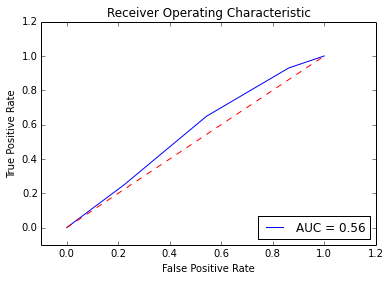

In [310]:
GetProfitModelMetrics(validation_profit, knn_validation_profit_pred, knn_validation_profit_pred_prob)

In [311]:
if hasattr(knn, "feature_importances_"):
    GetTopNPredictors(knn, movie_prediction_features, topN_record_no)

### Logistic Regression

In [372]:
lr = LogisticRegression()
lr_start_time = datetime.now()
print lr.fit(training_data, training_profit)
lr_end_time = datetime.now()
lr_train_time = lr_end_time - lr_start_time
print "Time to train classifier: " + str(lr_train_time)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time to train classifier: 0:00:38.730960


In [373]:
lr_validation_profit_pred = lr.predict(validation_data)

In [374]:
if hasattr(lr, "decision_function"):
    lr_validation_profit_pred_prob = lr.decision_function(validation_data)
else:
    lr_validation_profit_pred_prob = lr.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.423423423423
F1 Score = 0.423423423423
AUC = 0.491107047872

---------------------------------------------------------------------------

Confusion Matrix:

[[ 94   0]
 [128   0]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.42      1.00      0.59        94
        1.0       0.00      0.00      0.00       128

avg / total       0.18      0.42      0.25       222


---------------------------------------------------------------------------

ROC Curve:



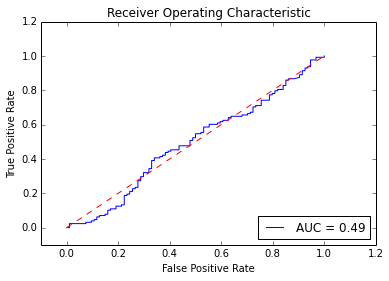

In [375]:
GetProfitModelMetrics(validation_profit, lr_validation_profit_pred, lr_validation_profit_pred_prob)

In [376]:
if hasattr(lr, "feature_importances_"):
    GetTopNPredictors(lr, movie_prediction_features, topN_record_no)

### Decision Tree

In [324]:
dt = DecisionTreeClassifier(random_state=0)
dt_start_time = datetime.now()
print dt.fit(training_data, training_profit)
dt_end_time = datetime.now()
dt_train_time = dt_end_time - dt_start_time
print "Time to train classifier: " + str(dt_train_time)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
Time to train classifier: 0:00:13.357863


In [325]:
dt_validation_profit_pred = dt.predict(validation_data)

In [320]:
if hasattr(dt, "decision_function"):
    dt_validation_profit_pred_prob = dt.decision_function(validation_data)
else:
    dt_validation_profit_pred_prob = dt.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.504504504505
F1 Score = 0.504504504505
AUC = 0.488364361702

---------------------------------------------------------------------------

Confusion Matrix:

[[36 58]
 [52 76]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.41      0.38      0.40        94
        1.0       0.57      0.59      0.58       128

avg / total       0.50      0.50      0.50       222


---------------------------------------------------------------------------

ROC Curve:



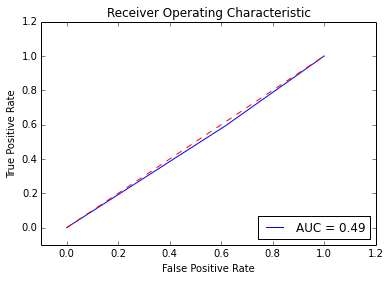

In [321]:
GetProfitModelMetrics(validation_profit, dt_validation_profit_pred, dt_validation_profit_pred_prob)

In [322]:
if hasattr(dt, "feature_importances_"):
    GetTopNPredictors(dt, movie_prediction_features, topN_record_no)


---------------------------------------------------------------------------

Top 25 Features in Descending Order:

length_clean
lda_topic_303
costs_clean
lda_topic_46
release_week
lda_topic_467
lda_topic_411
lda_topic_19
lda_topic_368
lda_topic_55
lda_topic_216
lda_topic_140
lda_topic_249
lda_topic_485
lda_topic_223
lda_topic_85
lda_topic_66
lda_topic_199
lda_topic_470
lda_topic_268
lda_topic_335
lda_topic_408
lda_topic_234
lda_topic_27
lda_topic_109


### Bagging Classifier

In [363]:
bgc = BaggingClassifier()
bgc_start_time = datetime.now()
print bgc.fit(training_data, training_profit)
bgc_end_time = datetime.now()
bgc_train_time = bgc_end_time - bgc_start_time
print "Time to train classifier: " + str(bgc_train_time)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
Time to train classifier: 0:02:13.668095


In [364]:
bgc_validation_profit_pred = bgc.predict(validation_data)
bgc_validation_profit_pred_prob = bgc.predict_proba(validation_data)

In [365]:
if hasattr(bgc, "decision_function"):
    bgc_validation_profit_pred_prob = bgc.decision_function(validation_data)
else:
    bgc_validation_profit_pred_prob = bgc.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.621621621622
F1 Score = 0.621621621622
AUC = 0.610621675532

---------------------------------------------------------------------------

Confusion Matrix:

[[42 52]
 [32 96]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.57      0.45      0.50        94
        1.0       0.65      0.75      0.70       128

avg / total       0.61      0.62      0.61       222


---------------------------------------------------------------------------

ROC Curve:



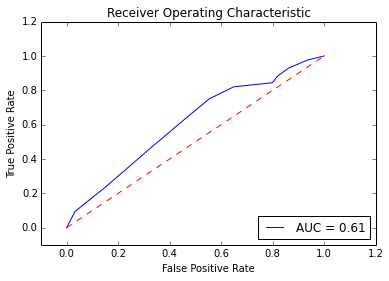

In [366]:
GetProfitModelMetrics(validation_profit, bgc_validation_profit_pred, bgc_validation_profit_pred_prob)

In [367]:
if hasattr(bgc, "feature_importances_"):
    GetTopNPredictors(bgc, movie_prediction_features, topN_record_no)

### AdaBoost Classifier

In [358]:
adbc = AdaBoostClassifier(n_estimators=1000)
adbc_start_time = datetime.now()
print adbc.fit(training_data, training_profit)
adbc_end_time = datetime.now()
adbc_train_time = adbc_end_time - adbc_start_time
print "Time to train classifier: " + str(adbc_train_time)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=None)
Time to train classifier: 0:09:27.617479


In [359]:
adbc_validation_profit_pred = adbc.predict(validation_data)

In [360]:
if hasattr(adbc, "decision_function"):
    adbc_validation_profit_pred_prob = adbc.decision_function(validation_data)
else:
    adbc_validation_profit_pred_prob = adbc.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.612612612613
F1 Score = 0.612612612613
AUC = 0.648769946809

---------------------------------------------------------------------------

Confusion Matrix:

[[47 47]
 [39 89]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.55      0.50      0.52        94
        1.0       0.65      0.70      0.67       128

avg / total       0.61      0.61      0.61       222


---------------------------------------------------------------------------

ROC Curve:



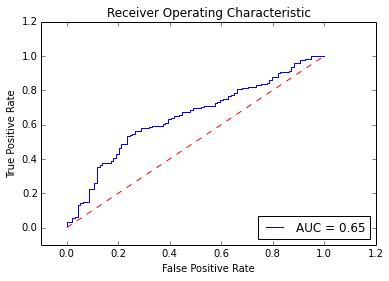

In [361]:
GetProfitModelMetrics(validation_profit, adbc_validation_profit_pred, adbc_validation_profit_pred_prob)

In [362]:
if hasattr(adbc, "feature_importances_"):
    GetTopNPredictors(adbc, movie_prediction_features, topN_record_no)


---------------------------------------------------------------------------

Top 25 Features in Descending Order:

costs_clean
lda_topic_467
length_clean
release_week
lda_topic_46
lda_topic_55
lda_topic_140
lda_topic_368
lda_topic_249
lda_topic_207
lda_topic_281
lda_topic_335
lda_topic_381
lda_topic_443
lda_topic_425
lda_topic_51
lda_topic_379
lda_topic_67
release_day_of_week
lda_topic_185
lda_topic_199
lda_topic_253
lda_topic_342
actor_Anthony Anderson
lda_topic_24


### Random Forest Classifier

In [348]:
rnfc = RandomForestClassifier(n_estimators=1000, max_features=1000)
rnfc_start_time = datetime.now()
print rnfc.fit(training_data, training_profit)
rnfc_end_time = datetime.now()
rnfc_train_time = rnfc_end_time - rnfc_start_time
print "Time to train classifier: " + str(rnfc_train_time)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1000, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
Time to train classifier: 0:06:33.874711


In [349]:
rnfc_validation_profit_pred = rnfc.predict(validation_data)

In [350]:
if hasattr(rnfc, "decision_function"):
    rnfc_validation_profit_pred_prob = rnfc.decision_function(validation_data)
else:
    rnfc_validation_profit_pred_prob = rnfc.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.621621621622
F1 Score = 0.621621621622
AUC = 0.650473736702

---------------------------------------------------------------------------

Confusion Matrix:

[[ 30  64]
 [ 20 108]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.60      0.32      0.42        94
        1.0       0.63      0.84      0.72       128

avg / total       0.62      0.62      0.59       222


---------------------------------------------------------------------------

ROC Curve:



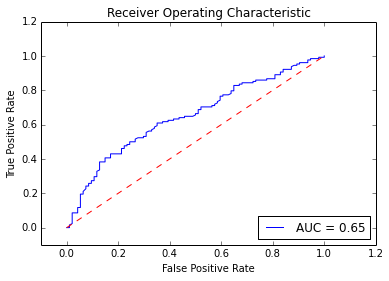

In [351]:
GetProfitModelMetrics(validation_profit, rnfc_validation_profit_pred, rnfc_validation_profit_pred_prob)

In [352]:
if hasattr(rnfc, "feature_importances_"):
    GetTopNPredictors(rnfc, movie_prediction_features, topN_record_no)


---------------------------------------------------------------------------

Top 25 Features in Descending Order:

costs_clean
length_clean
lda_topic_467
lda_topic_46
release_week
lda_topic_368
lda_topic_411
lda_topic_19
lda_topic_140
lda_topic_249
lda_topic_85
lda_topic_253
lda_topic_443
lda_topic_410
lda_topic_41
lda_topic_66
lda_topic_485
lda_topic_409
lda_topic_281
lda_topic_216
lda_topic_335
lda_topic_98
lda_topic_51
lda_topic_276
lda_topic_24


### Gradient Boosting Classifier

In [353]:
gbc = GradientBoostingClassifier()
gbc_start_time = datetime.now()
print gbc.fit(training_data, training_profit)
gbc_end_time = datetime.now()
gbc_train_time = gbc_end_time - gbc_start_time
print "Time to train classifier: " + str(gbc_train_time)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
Time to train classifier: 0:01:48.111425


In [368]:
gbc_validation_profit_pred = gbc.predict(validation_data)

In [369]:
if hasattr(gbc, "decision_function"):
    gbc_validation_profit_pred_prob = gbc.decision_function(validation_data)
else:
    gbc_validation_profit_pred_prob = gbc.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.608108108108
F1 Score = 0.608108108108
AUC = 0.600232712766

---------------------------------------------------------------------------

Confusion Matrix:

[[ 27  67]
 [ 20 108]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.57      0.29      0.38        94
        1.0       0.62      0.84      0.71       128

avg / total       0.60      0.61      0.57       222


---------------------------------------------------------------------------

ROC Curve:



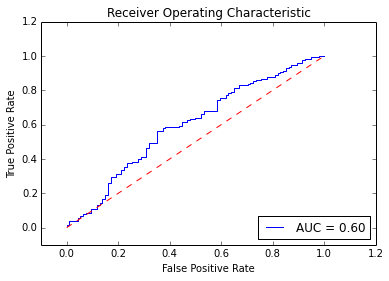

In [370]:
GetProfitModelMetrics(validation_profit, gbc_validation_profit_pred, gbc_validation_profit_pred_prob)

In [371]:
if hasattr(gbc, "feature_importances_"):
    GetTopNPredictors(gbc, movie_prediction_features, topN_record_no)


---------------------------------------------------------------------------

Top 25 Features in Descending Order:

costs_clean
lda_topic_368
lda_topic_467
length_clean
release_week
lda_topic_85
lda_topic_281
lda_topic_46
lda_topic_409
studio_MTV Films
lda_topic_249
lda_topic_67
lda_topic_381
lda_topic_253
studio_Dune Entertainment
lda_topic_185
cinematographer_Robert Presley
lda_topic_443
lda_topic_98
editor_Gregory Perler
studio_Walt Disney Pictures
lda_topic_408
lda_topic_140
studio_Perry Productions
lda_topic_317


### Stochastic Gradient Descent Classifier

In [338]:
sgdc = SGDClassifier()
sgdc_start_time = datetime.now()
print sgdc.fit(training_data, training_profit)
sgdc_end_time = datetime.now()
sgdc_train_time = sgdc_end_time - sgdc_start_time
print "Time to train classifier: " + str(sgdc_train_time)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
Time to train classifier: 0:00:33.042153


In [339]:
sgdc_validation_profit_pred = sgdc.predict(validation_data)

In [340]:
if hasattr(sgdc, "decision_function"):
    sgdc_validation_profit_pred_prob = sgdc.decision_function(validation_data)
else:
    sgdc_validation_profit_pred_prob = sgdc.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.423423423423
F1 Score = 0.423423423423
AUC = 0.491107047872

---------------------------------------------------------------------------

Confusion Matrix:

[[ 94   0]
 [128   0]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.42      1.00      0.59        94
        1.0       0.00      0.00      0.00       128

avg / total       0.18      0.42      0.25       222


---------------------------------------------------------------------------

ROC Curve:



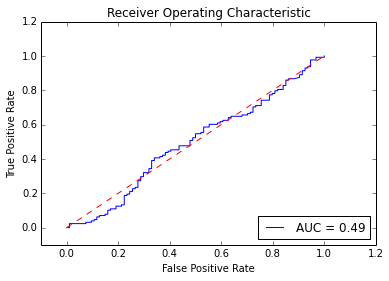

In [341]:
GetProfitModelMetrics(validation_profit, sgdc_validation_profit_pred, sgdc_validation_profit_pred_prob)

In [342]:
if hasattr(sgdc, "feature_importances_"):
    GetTopNPredictors(sgdc, movie_prediction_features, topN_record_no)

### Support Vector Machine Classifier

In [333]:
svmc = SVC(kernel='sigmoid')
svmc_start_time = datetime.now()
print svmc.fit(training_data, training_profit)
svmc_end_time = datetime.now()
svmc_train_time = svmc_end_time - svmc_start_time
print "Time to train classifier: " + str(svmc_train_time)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Time to train classifier: 0:04:29.429835


In [334]:
svmc_validation_profit_pred = svmc.predict(validation_data)

In [335]:
if hasattr(svmc, "decision_function"):
    svmc_validation_profit_pred_prob = svmc.decision_function(validation_data)
else:
    svmc_validation_profit_pred_prob = svmc.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.576576576577
F1 Score = 0.576576576577
AUC = 0.5

---------------------------------------------------------------------------

Confusion Matrix:

[[  0  94]
 [  0 128]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        94
        1.0       0.58      1.00      0.73       128

avg / total       0.33      0.58      0.42       222


---------------------------------------------------------------------------

ROC Curve:



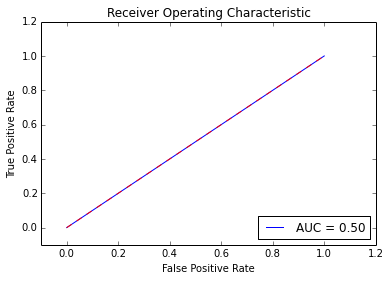

In [336]:
GetProfitModelMetrics(validation_profit, svmc_validation_profit_pred, svmc_validation_profit_pred_prob)

In [337]:
if hasattr(svmc, "feature_importances_"):
    GetTopNPredictors(svmc, movie_prediction_features, topN_record_no)

### Neural Network

In [328]:
mlp = MLPClassifier()
mlp_start_time = datetime.now()
print mlp.fit(training_data, training_profit)
mlp_end_time = datetime.now()
mlp_train_time = mlp_end_time - mlp_start_time
print "Time to train classifier: " + str(mlp_train_time)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Time to train classifier: 0:00:30.124002


In [329]:
mlp_validation_profit_pred = mlp.predict(validation_data)

In [330]:
if hasattr(mlp, "decision_function"):
    mlp_validation_profit_pred_prob = mlp.decision_function(validation_data)
else:
    mlp_validation_profit_pred_prob = mlp.predict_proba(validation_data)[:,1]


---------------------------------------------------------------------------

Validation Metrics:

Accuracy = 0.576576576577
F1 Score = 0.576576576577
AUC = 0.5

---------------------------------------------------------------------------

Confusion Matrix:

[[  0  94]
 [  0 128]]

---------------------------------------------------------------------------

Classification Report:

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        94
        1.0       0.58      1.00      0.73       128

avg / total       0.33      0.58      0.42       222


---------------------------------------------------------------------------

ROC Curve:



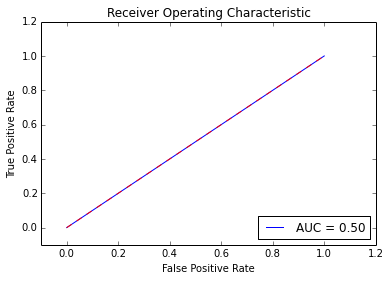

In [331]:
GetProfitModelMetrics(validation_profit, mlp_validation_profit_pred, mlp_validation_profit_pred_prob)

In [332]:
if hasattr(mlp, "feature_importances_"):
    GetTopNPredictors(mlp, movie_prediction_features, topN_record_no)

# Interface Functions

### Get associated topic scores for input plot 

### Get prediction array for input movie  

### Get predicted revenue for input movie 